## Library and Data Import

In [ ]:
pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
import git
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import RocCurveDisplay
import seaborn as sns
from scipy.stats import mode
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from mlxtend.evaluate import bootstrap_point632_score
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


### Download data from github

In [ ]:
def download_github_repository(repo_url, destination_folder):
    try:
        git.Git(destination_folder).clone(repo_url)
        print(f"Repository successfully downloaded to {destination_folder}")
    except git.exc.GitCommandError as e:
        print(f"Error downloading the repository: {e}")

In [ ]:
repository_url = "https://github.com/joel-day/ADS_504_IBM_Churn"
destination_folder = "/content/sample_data"
download_github_repository(repository_url, destination_folder)

df = pd.read_csv('/content/sample_data/ADS_504_IBM_Churn/Telco_customer_churn.csv')
df.columns = df.columns.str.replace(' ', '_')
df.head()

Repository successfully downloaded to /content/sample_data


,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Create lists of columns names - seperate by data type


In [ ]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip_Code               int64
Lat_Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Label           object
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
Churn_Reason          object
dtype: object

In [ ]:
num_cols_all = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols_all

['Count',
 'Zip_Code',
 'Latitude',
 'Longitude',
 'Tenure_Months',
 'Monthly_Charges',
 'Churn_Value',
 'Churn_Score',
 'CLTV']

In [ ]:
cat_cols_all = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
cat_cols_all

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat_Long',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Total_Charges',
 'Churn_Label',
 'Churn_Reason']

## Data Preprocessing

### Remove degenerated variables

In [ ]:
# Check for degenerated variables
degenerated_variables = []

for column in df.columns:
    if df[column].nunique() == 1:
        degenerated_variables.append(column)

print("Degenerated Variables:", degenerated_variables)

Degenerated Variables: ['Count', 'Country', 'State']


Degenerated columns and account identifier (unique to each observation) will be dropped.



In [ ]:
df = df.drop(['CustomerID', 'Count','Country','State'], axis=1)

## Exploratory Data Analysis

In [ ]:
df.isna().sum()

City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn_Label             0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

In [ ]:
df.shape

(7043, 29)

### Numerical Variables

In [ ]:
# Subset numeric vars
numVars = ['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'CLTV', 'Churn_Score']
dfNum = df[numVars]
dfNum = dfNum.apply(pd.to_numeric, errors='coerce')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

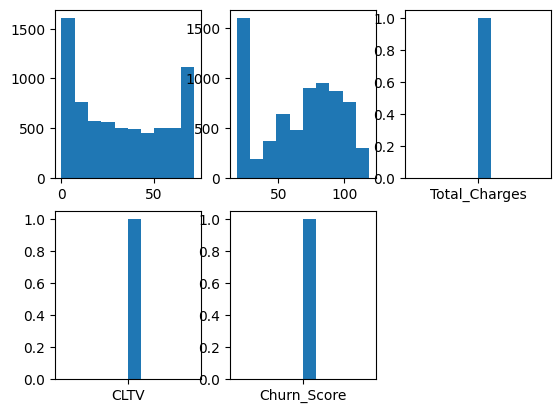

In [ ]:
#Show distributions
plt.subplot(2,3,1)
plt.hist(dfNum['Tenure_Months'])

plt.subplot(2,3,2)
plt.hist(dfNum['Monthly_Charges'])

plt.subplot(2,3,3)
plt.hist(['Total_Charges'])

plt.subplot(2,3,4)
plt.hist(['CLTV'])

plt.subplot(2,3,5)
plt.hist(['Churn_Score'])

In [ ]:
dfNum.describe()

,Tenure_Months,Monthly_Charges,Total_Charges,CLTV,Churn_Score
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,4400.295755,58.699418
std,24.559481,30.090047,2266.771362,1183.057152,21.525131
min,0.000000,18.250000,18.800000,2003.000000,5.000000
25%,9.000000,35.500000,401.450000,3469.000000,40.000000
50%,29.000000,70.350000,1397.475000,4527.000000,61.000000
75%,55.000000,89.850000,3794.737500,5380.500000,75.000000
max,72.000000,118.750000,8684.800000,6500.000000,100.000000


Text(0.5, 1.0, 'Tenure Months by Churn Label')

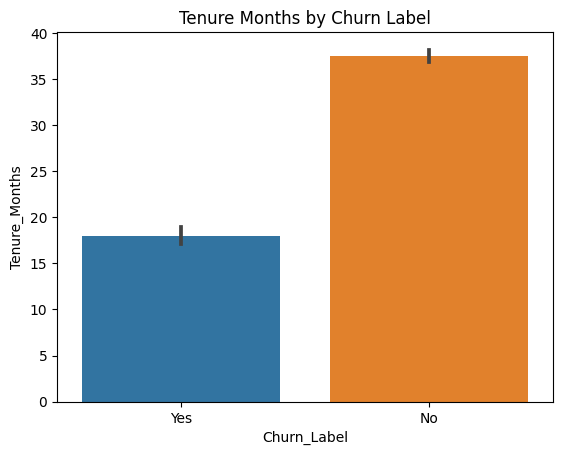

In [ ]:
# Plot against churn label
sns.barplot(data=df,x='Churn_Label', y='Tenure_Months')
plt.title("Tenure Months by Churn Label")

Text(0.5, 1.0, 'IBM SPSS Churn Score by Churn')

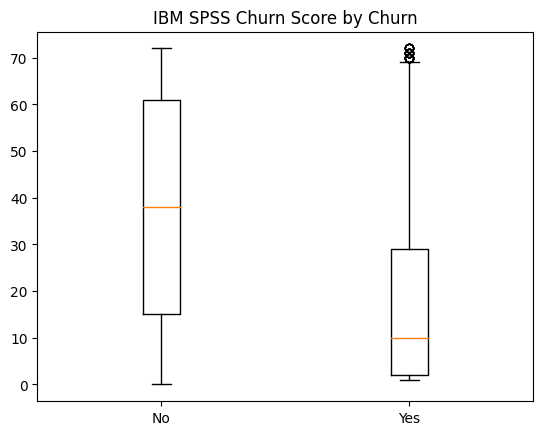

In [ ]:
groupedTenMth = df.groupby('Churn_Value')['Tenure_Months'].apply(list)
boxplot = plt.boxplot(groupedTenMth, labels=['No','Yes'])
plt.title('IBM SPSS Churn Score by Churn')

In [ ]:
# Extract boxplot statistics
medians = [median.get_ydata()[0] for median in boxplot['medians']]
q1_lines = [q1.get_ydata()[0] for q1 in boxplot['boxes']]
q3_lines = [q3.get_ydata()[2] for q3 in boxplot['boxes']]
lower_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][:2]]
upper_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][2:4]]
outliers = boxplot['fliers'][0].get_ydata()

# Print statistics
print("Medians:", medians)
print("Q1 (25th percentiles):", q1_lines)
print("Q3 (75th percentiles):", q3_lines)
print("Lower Whiskers:", lower_whiskers)
print("Upper Whiskers:", upper_whiskers)
print("Outliers:", outliers)

Medians: [38.0, 10.0]
Q1 (25th percentiles): [15.0, 2.0]
Q3 (75th percentiles): [61.0, 29.0]
Lower Whiskers: [0.0, 72.0]
Upper Whiskers: [1.0, 69.0]
Outliers: []


* On average, customers who churned were with the company for 18 months.
* Newer customers churned more frequently
* Suggests that newer customers should be monitored more closely for churn. Company should offer promotions and incentivize customers to sign longer contracts (e.g reduced rates if the customer signs up for a 3 year contract)

Text(0.5, 1.0, 'Monthly Charges by Churn')

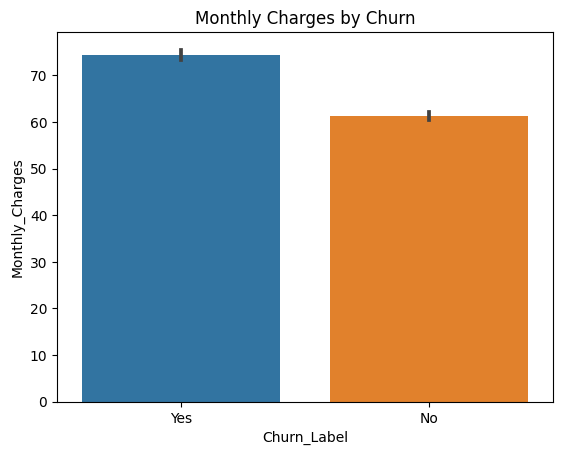

In [ ]:
sns.barplot(data=df,x='Churn_Label', y='Monthly_Charges')
plt.title("Monthly Charges by Churn")

Text(0.5, 1.0, 'Monthly Charges by Churn')

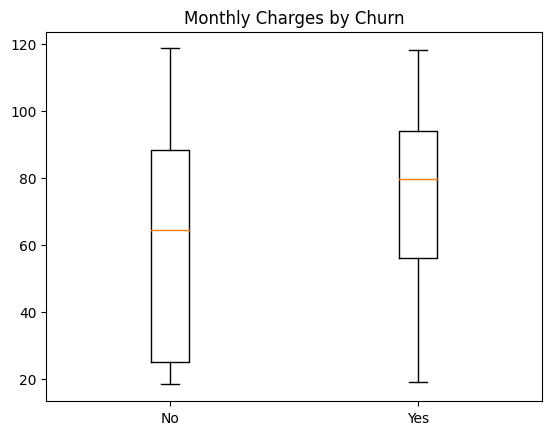

In [ ]:
groupedMthCharges = df.groupby('Churn_Value')['Monthly_Charges'].apply(list)
boxplot = plt.boxplot(groupedMthCharges, labels=['No','Yes'])
plt.title('Monthly Charges by Churn')

In [ ]:
# Extract boxplot statistics
medians = [median.get_ydata()[0] for median in boxplot['medians']]
q1_lines = [q1.get_ydata()[0] for q1 in boxplot['boxes']]
q3_lines = [q3.get_ydata()[2] for q3 in boxplot['boxes']]
lower_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][:2]]
upper_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][2:4]]
outliers = boxplot['fliers'][0].get_ydata()

# Print statistics
print("Medians:", medians)
print("Q1 (25th percentiles):", q1_lines)
print("Q3 (75th percentiles):", q3_lines)
print("Lower Whiskers:", lower_whiskers)
print("Upper Whiskers:", upper_whiskers)
print("Outliers:", outliers)

Medians: [64.42500000000001, 79.65]
Q1 (25th percentiles): [25.1, 56.15]
Q3 (75th percentiles): [88.4, 94.2]
Lower Whiskers: [18.25, 118.75]
Upper Whiskers: [18.85, 118.35]
Outliers: []


* On average, customers who churned had higher monthly charges (~$15)
* This could be a potential area for customer retentiion--find ways to reduce monthly charges for customers at risk of churning, such as promotions, family discounts, etc

Text(0.5, 1.0, 'Total Charges by Churn Label')

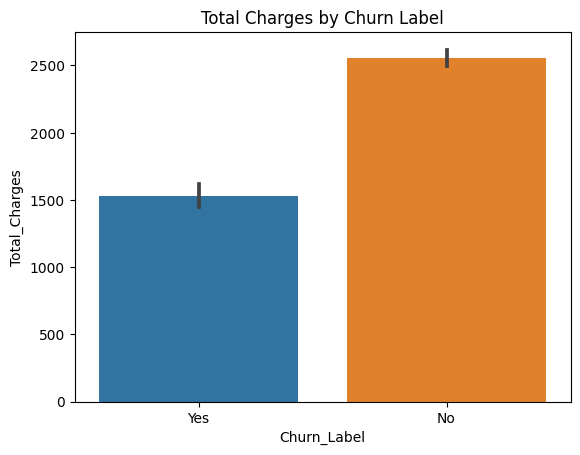

In [ ]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'],errors='coerce')
sns.barplot(data=df,x='Churn_Label', y='Total_Charges')
plt.title("Total Charges by Churn Label")

Text(0.5, 1.0, 'Total Charges by Churn')

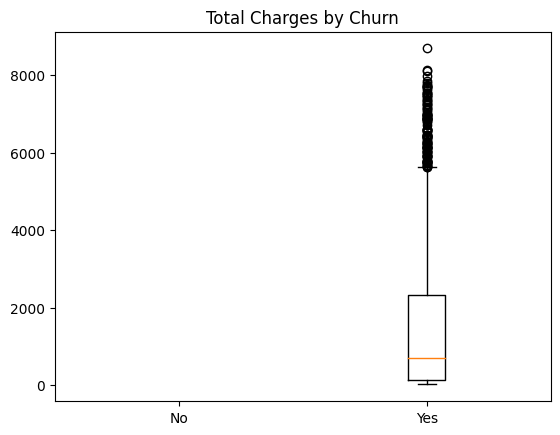

In [ ]:
groupedTotCharges = df.groupby('Churn_Value')['Total_Charges'].apply(list)
boxplot = plt.boxplot(groupedTotCharges, labels=['No','Yes'])
plt.title('Total Charges by Churn')

In [ ]:
# Extract boxplot statistics
medians = [median.get_ydata()[0] for median in boxplot['medians']]
q1_lines = [q1.get_ydata()[0] for q1 in boxplot['boxes']]
q3_lines = [q3.get_ydata()[2] for q3 in boxplot['boxes']]
lower_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][:2]]
upper_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][2:4]]
outliers = boxplot['fliers'][0].get_ydata()

# Print statistics
print("Medians:", medians)
print("Q1 (25th percentiles):", q1_lines)
print("Q3 (75th percentiles):", q3_lines)
print("Lower Whiskers:", lower_whiskers)
print("Upper Whiskers:", upper_whiskers)
print("Outliers:", outliers)

Medians: [nan, 703.55]
Q1 (25th percentiles): [nan, 134.5]
Q3 (75th percentiles): [nan, 2331.3]
Lower Whiskers: [nan, nan]
Upper Whiskers: [18.85, 5624.85]
Outliers: []


* Customers who churned had ~$1000 less in total charges. This could be due to the length of the contract, the number of services, etc.
* This distribution looks very similar to that of Tenure_Months vs. Churn Label. Indicates strong correlation (see Correlation Matrix below)

Text(0.5, 1.0, 'Customer Lifetime Value (CLTV) by Churn Label')

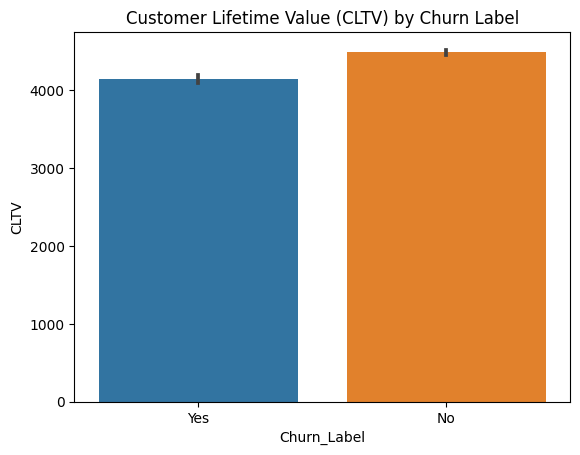

In [ ]:
sns.barplot(data=df,x='Churn_Label', y='CLTV')
plt.title("Customer Lifetime Value (CLTV) by Churn Label")

Text(0.5, 1.0, 'Customer Lifetime Value by Churn')

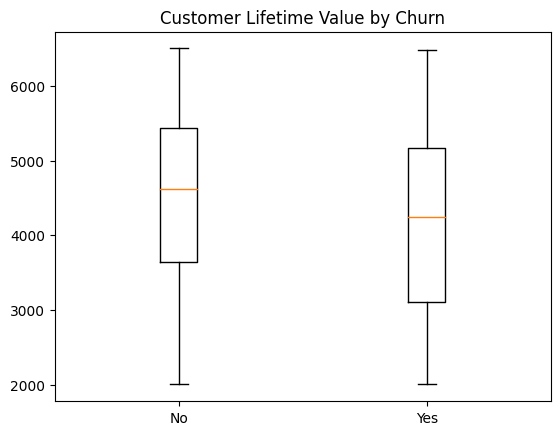

In [ ]:
groupedCLTV = df.groupby('Churn_Value')['CLTV'].apply(list)
boxplot = plt.boxplot(groupedCLTV, labels=['No','Yes'])
plt.title('Customer Lifetime Value by Churn')

In [ ]:
# Extract boxplot statistics
medians = [median.get_ydata()[0] for median in boxplot['medians']]
q1_lines = [q1.get_ydata()[0] for q1 in boxplot['boxes']]
q3_lines = [q3.get_ydata()[2] for q3 in boxplot['boxes']]
lower_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][:2]]
upper_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][2:4]]
outliers = boxplot['fliers'][0].get_ydata()

# Print statistics
print("Medians:", medians)
print("Q1 (25th percentiles):", q1_lines)
print("Q3 (75th percentiles):", q3_lines)
print("Lower Whiskers:", lower_whiskers)
print("Upper Whiskers:", upper_whiskers)
print("Outliers:", outliers)

Medians: [4620.0, 4238.0]
Q1 (25th percentiles): [3643.75, 3101.0]
Q3 (75th percentiles): [5434.75, 5166.0]
Lower Whiskers: [2003.0, 6500.0]
Upper Whiskers: [2003.0, 6484.0]
Outliers: []


* On average, customers who churned had a lower CLTV (although this is a small difference)

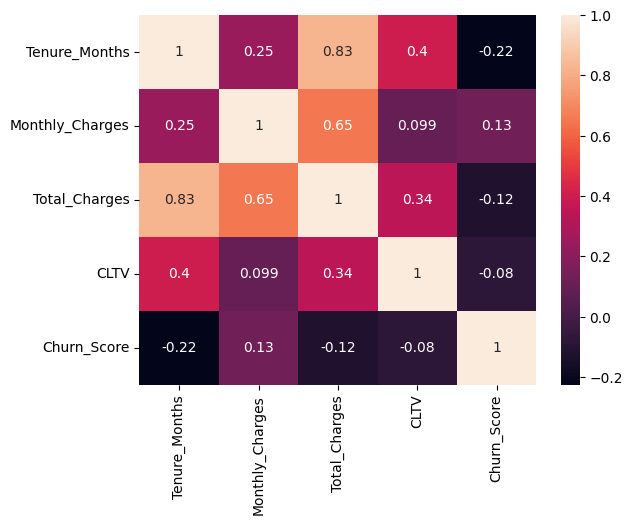

In [ ]:
corr_matrix = dfNum.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

* Total_Charges is highly correlated with  Tenure_Months (r=.83) and moderately correlated with Monthly Charges (r=.65)

### Categorical Variables

In [ ]:
# Separate categorical variables
varsDrop = ['City','Tenure_Months','Monthly_Charges','Total_Charges','CLTV','Zip_Code', 'Lat_Long', 'Latitude', 'Longitude', 'Churn_Label', 'Churn_Value','Churn_Reason','Churn_Score']
dfCat = df.drop(varsDrop, axis=1)
dfCat

,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method
0,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
7039,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7040,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7041,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check


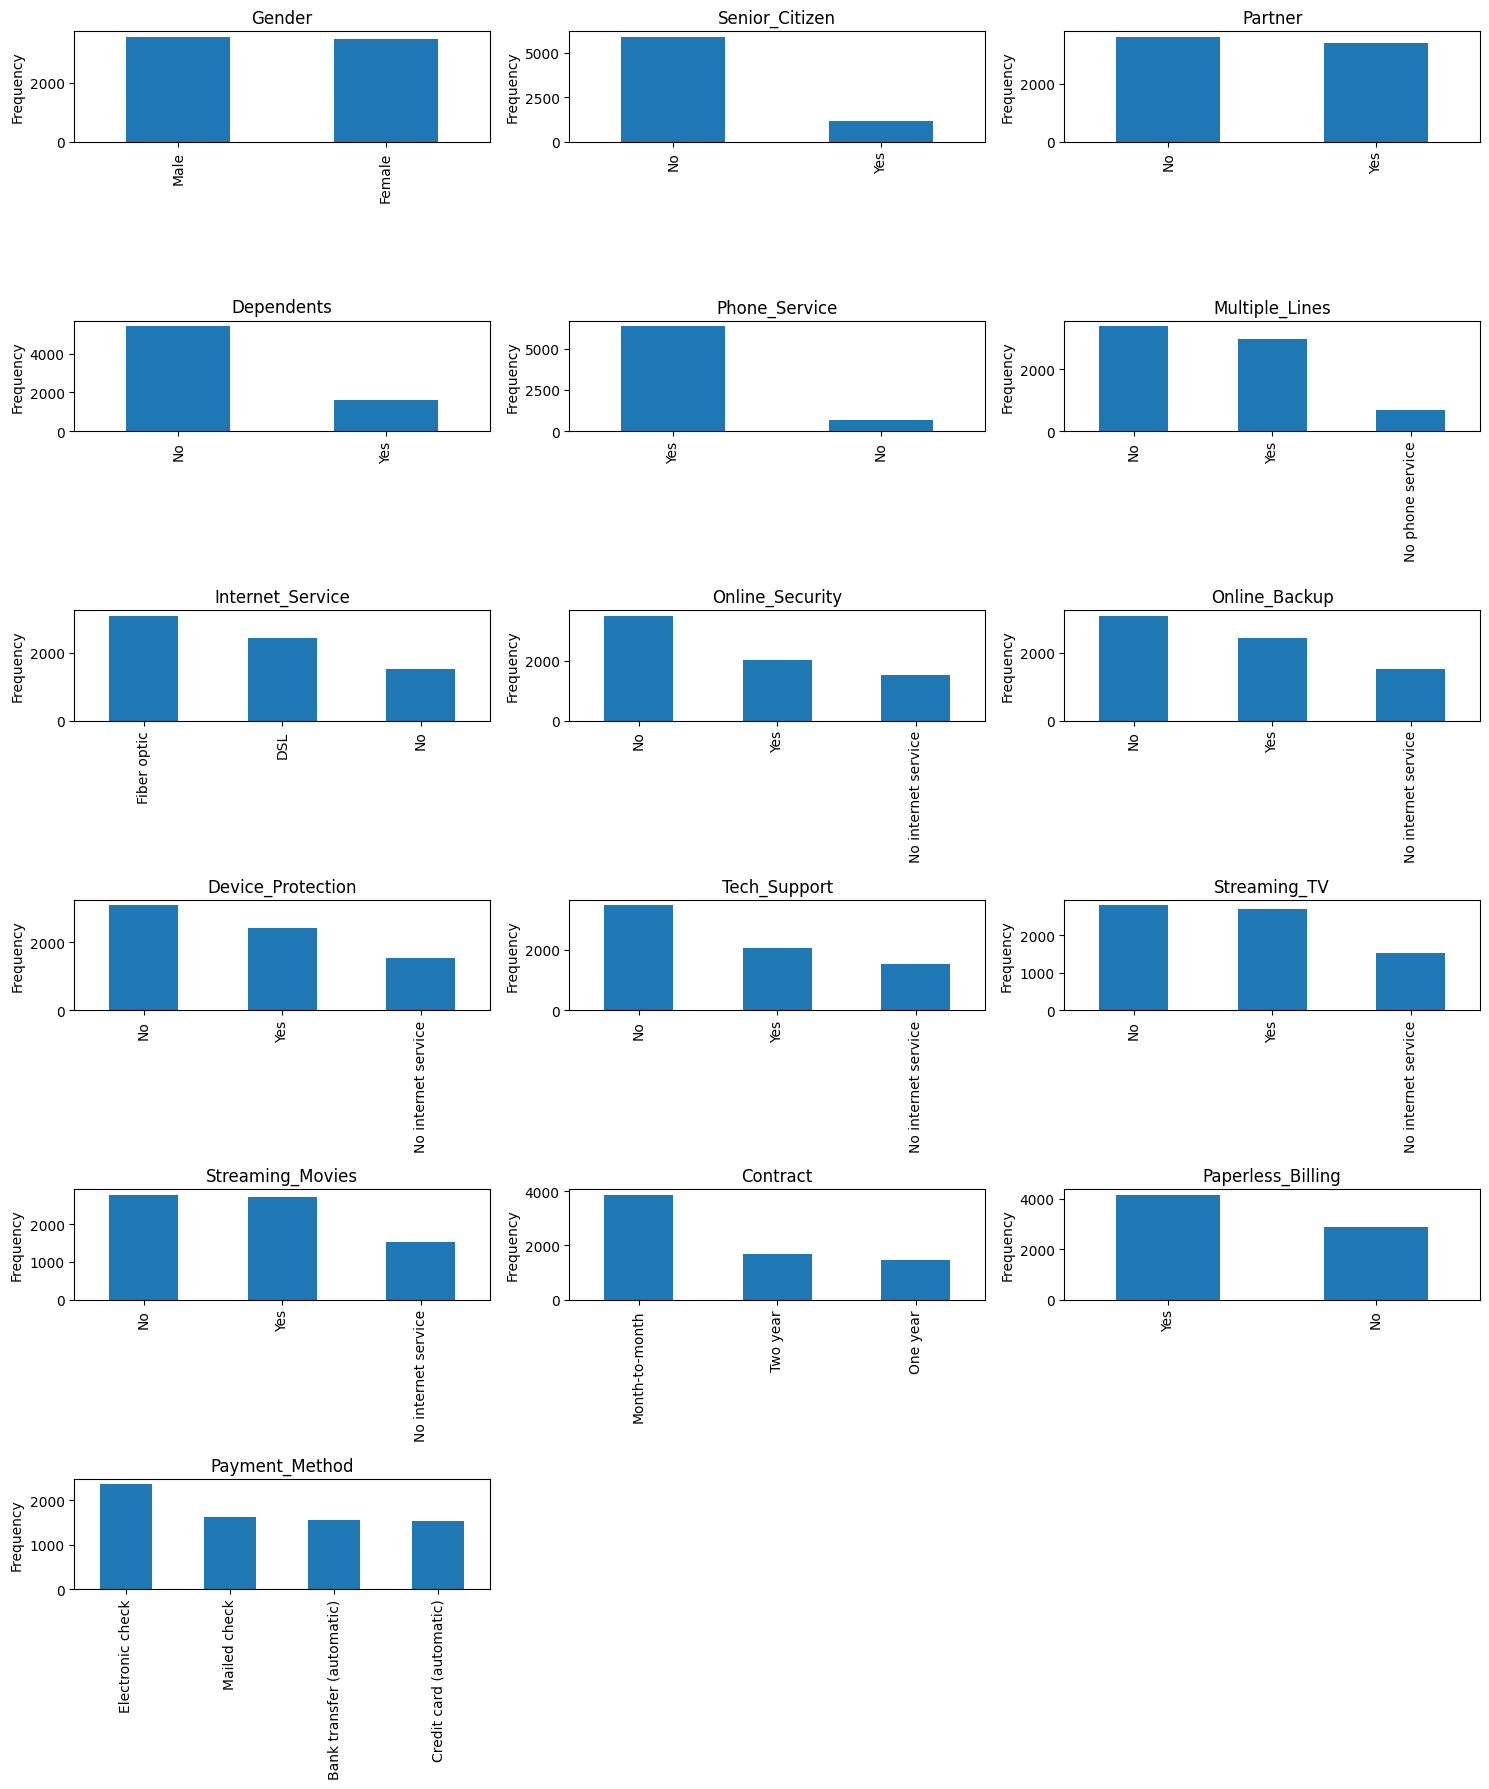

In [ ]:
### Show distributions ###
# Calculate the number of rows and columns needed for the subplot grid
num_cols = dfCat.shape[1]
num_rows = (num_cols + 2) // 3  # To have a 3-column layout

# Ensure we have 6 rows
if num_rows > 6:
    num_rows = 6

# Create the subplot grid
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 3*num_rows))

# Flatten axs array in case we have only one row
axs = axs.flatten()

# Iterate through each column and create a bar chart
for i, column in enumerate(dfCat.columns):
    ax = axs[i]
    dfCat[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(column)
    ax.set_ylabel("Frequency")

# Remove any empty subplots
for i in range(num_cols, len(axs)):
    axs[i].axis('off')

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
# Create cross-tab tables and visualize
for column in dfCat.columns:
    cross_tab = pd.crosstab(index=dfCat[column], columns=df['Churn_Label'])
    print(cross_tab)

Churn_Label    No  Yes
Gender                
Female       2549  939
Male         2625  930
Churn_Label       No   Yes
Senior_Citizen            
No              4508  1393
Yes              666   476
Churn_Label    No   Yes
Partner                
No           2441  1200
Yes          2733   669
Churn_Label    No   Yes
Dependents             
No           3653  1763
Yes          1521   106
Churn_Label      No   Yes
Phone_Service            
No              512   170
Yes            4662  1699
Churn_Label         No  Yes
Multiple_Lines             
No                2541  849
No phone service   512  170
Yes               2121  850
Churn_Label         No   Yes
Internet_Service            
DSL               1962   459
Fiber optic       1799  1297
No                1413   113
Churn_Label            No   Yes
Online_Security                
No                   2037  1461
No internet service  1413   113
Yes                  1724   295
Churn_Label            No   Yes
Online_Backup              

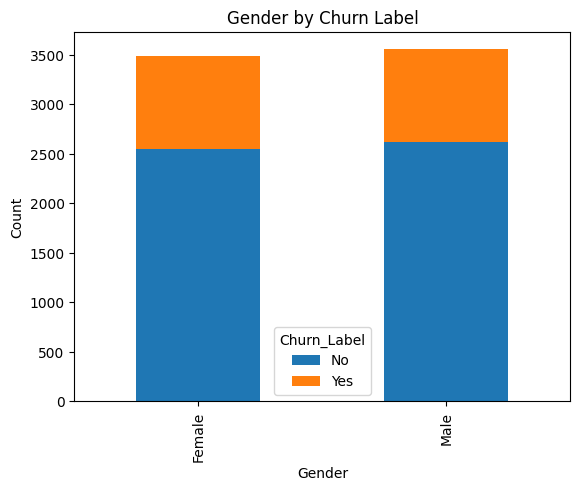

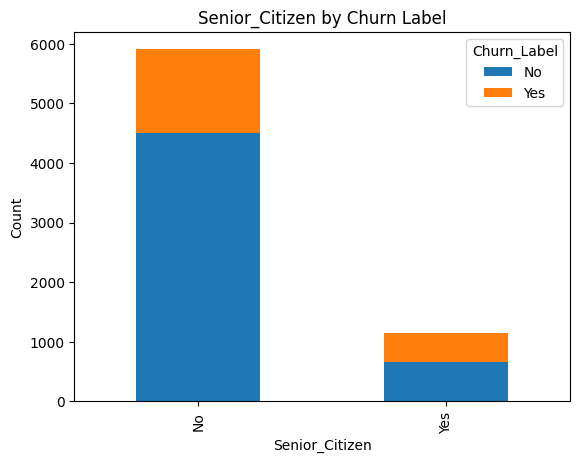

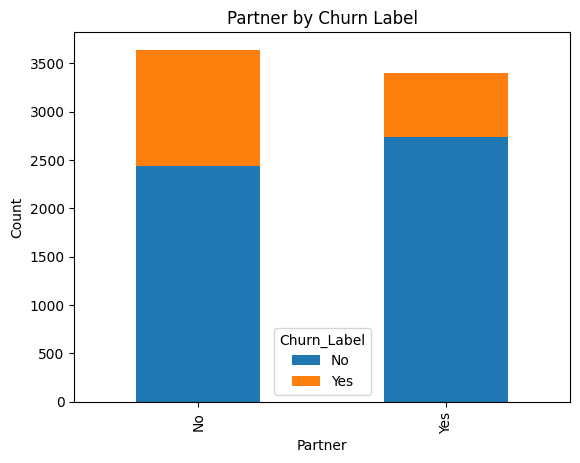

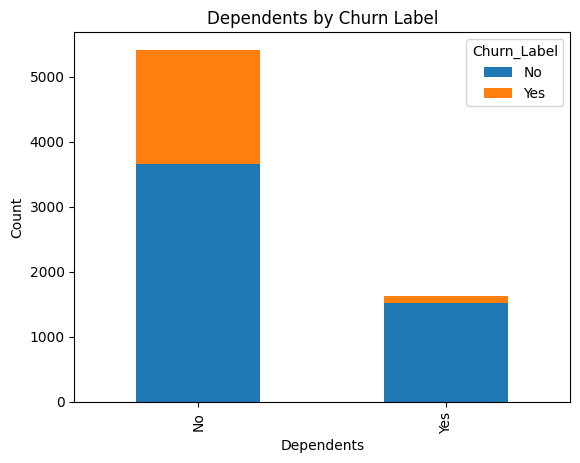

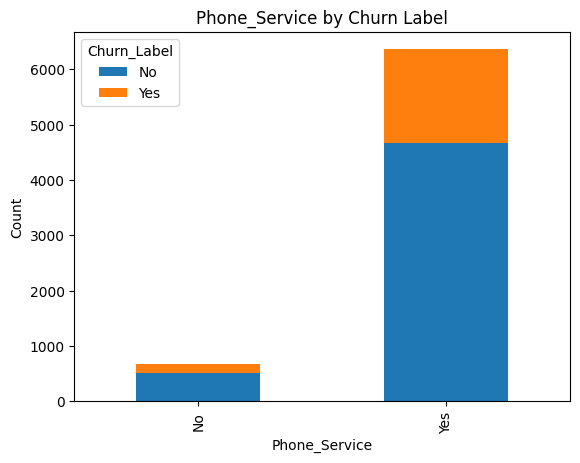

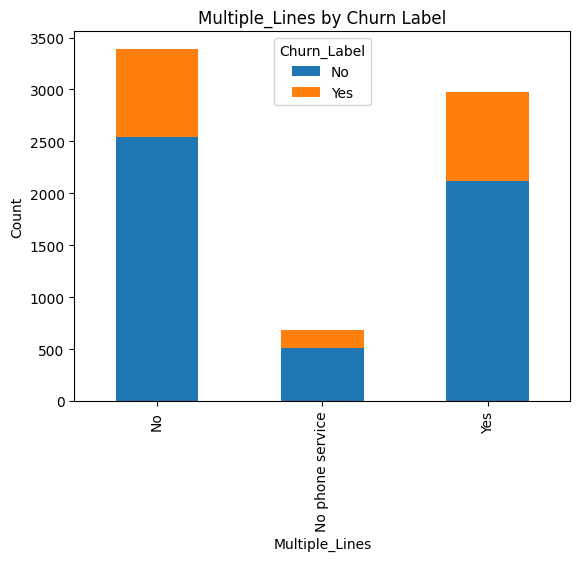

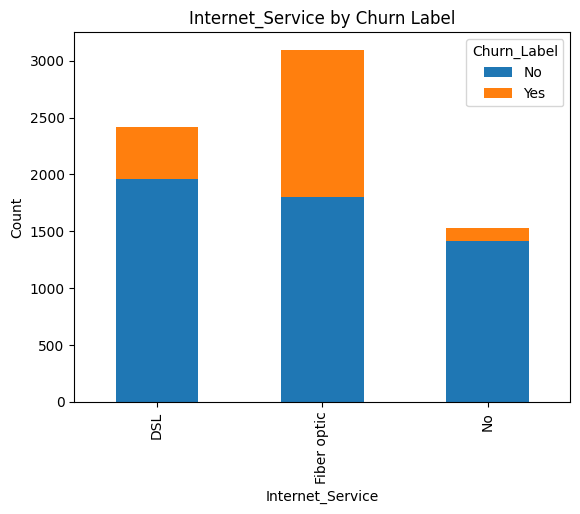

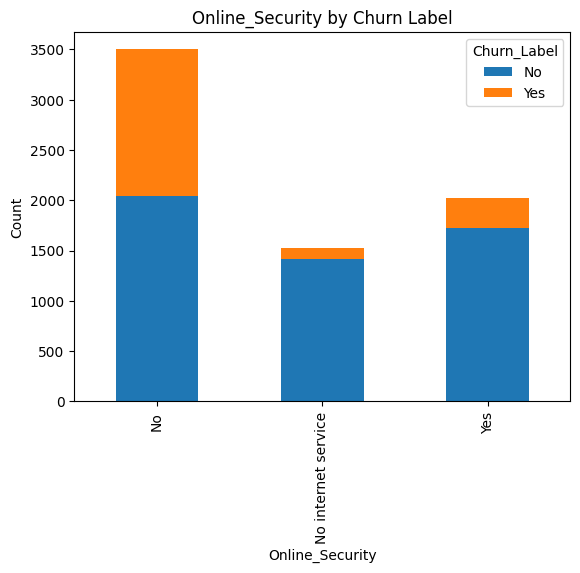

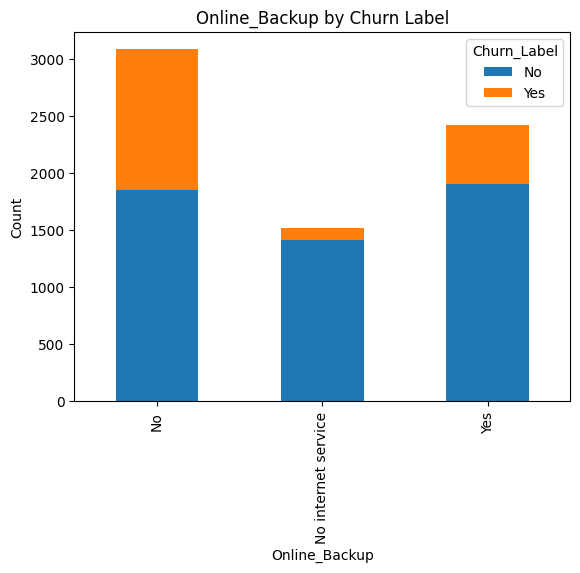

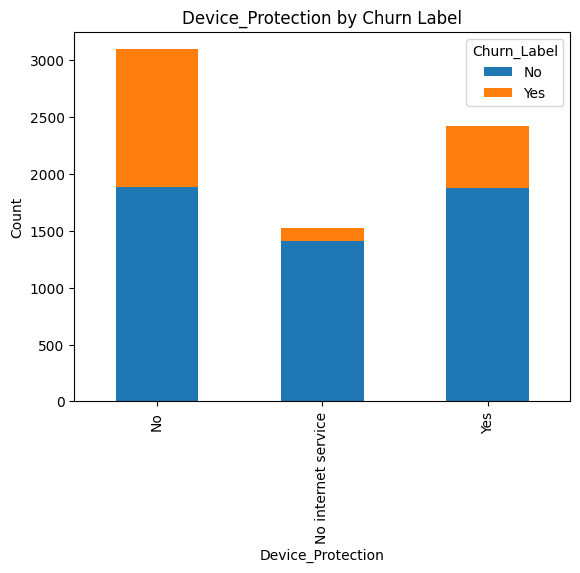

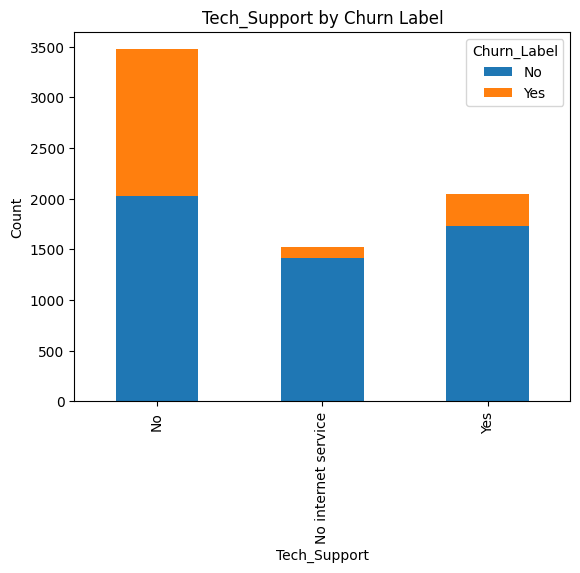

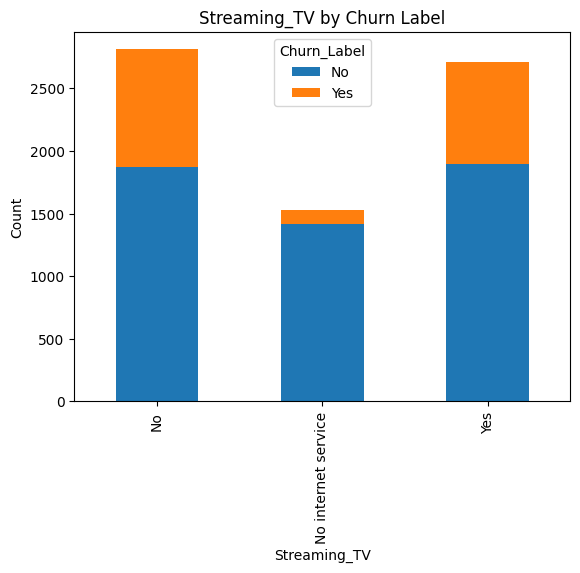

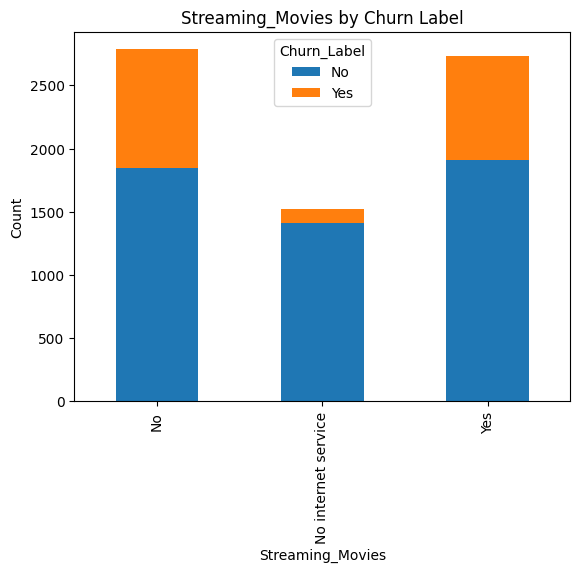

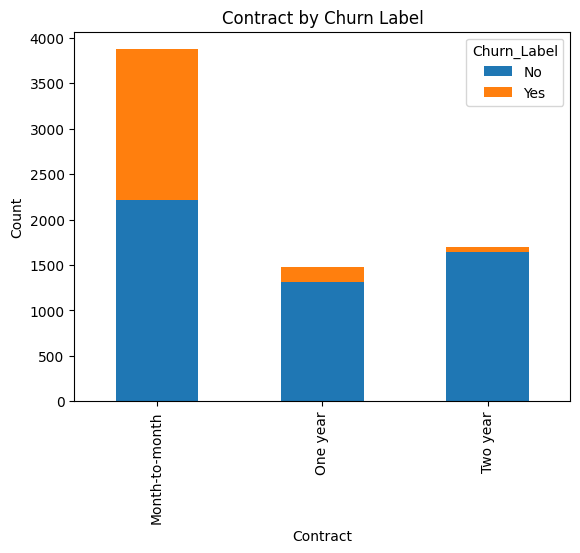

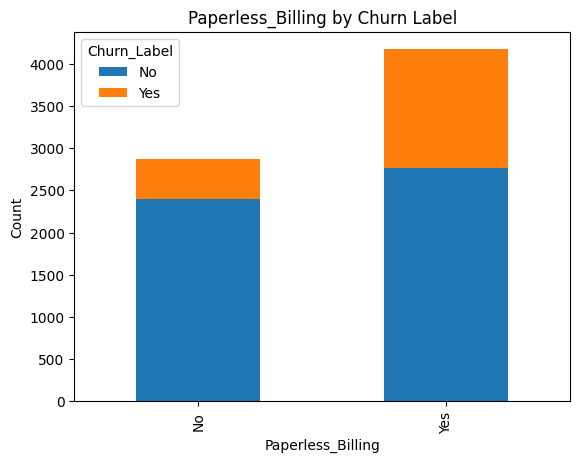

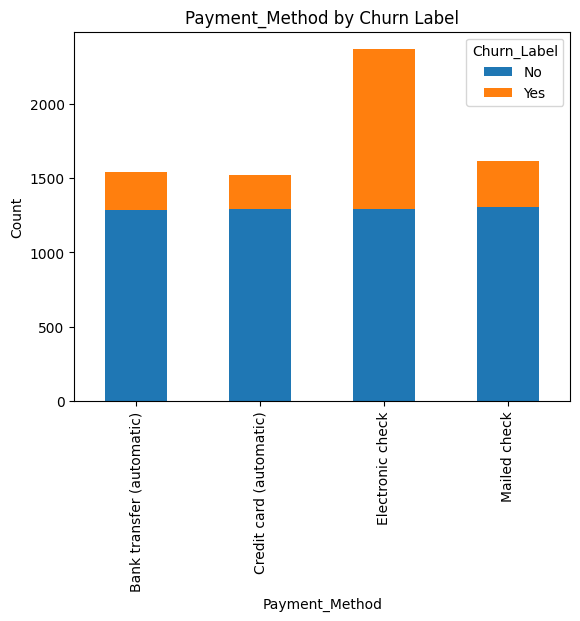

In [ ]:
for column in dfCat.columns:
    cross_tab = pd.crosstab(index=dfCat[column], columns=df['Churn_Label'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"{column} by Churn Label")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Normalized cross-tab tables and visualize w/ barcharts
for column in dfCat.columns:
    cross_tab = pd.crosstab(index=dfCat[column], columns=df['Churn_Label'])
    cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
    norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
    print(norm_cross_tab)

Churn_Label        No       Yes
Gender                         
Female       0.495477  0.504523
Male         0.504478  0.495522
Churn_Label           No       Yes
Senior_Citizen                    
No              0.538985  0.461015
Yes             0.335938  0.664062
Churn_Label        No       Yes
Partner                        
No           0.423698  0.576302
Yes          0.595937  0.404063
Churn_Label        No       Yes
Dependents                     
No           0.428138  0.571862
Yes          0.837607  0.162393
Churn_Label          No       Yes
Phone_Service                    
No             0.521053  0.478947
Yes            0.497790  0.502210
Churn_Label             No       Yes
Multiple_Lines                      
No                0.519577  0.480423
No phone service  0.521053  0.478947
Yes               0.473988  0.526012
Churn_Label             No       Yes
Internet_Service                    
DSL               0.606400  0.393600
Fiber optic       0.333973  0.666027
No     

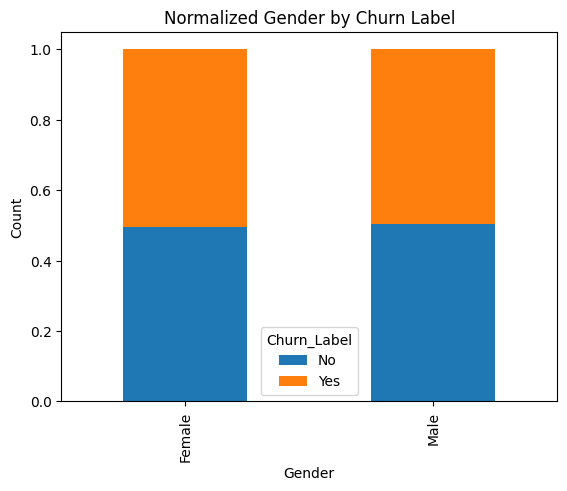

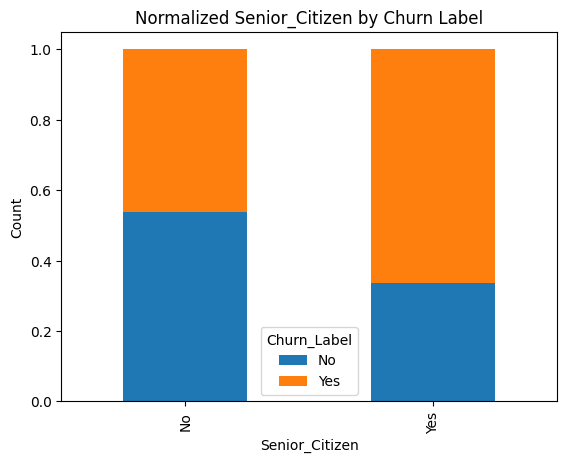

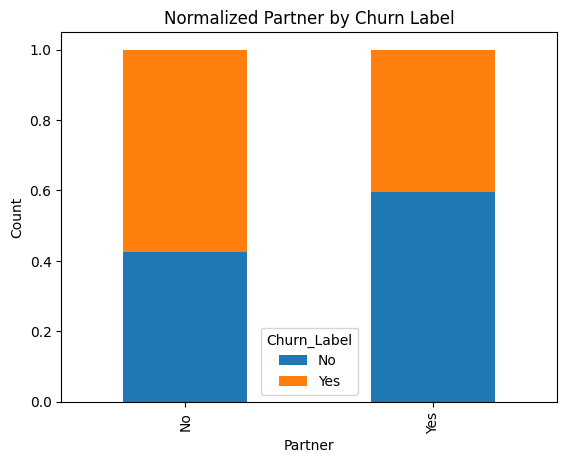

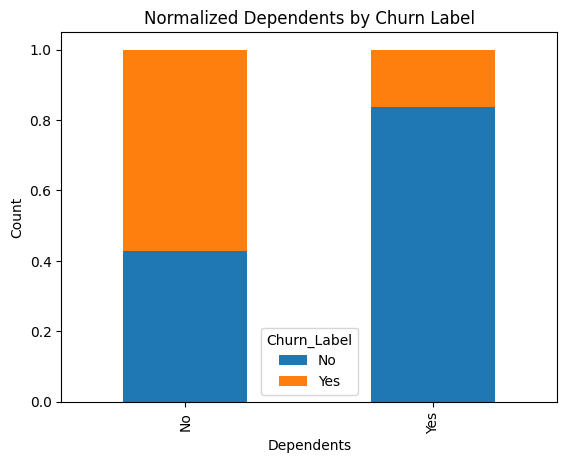

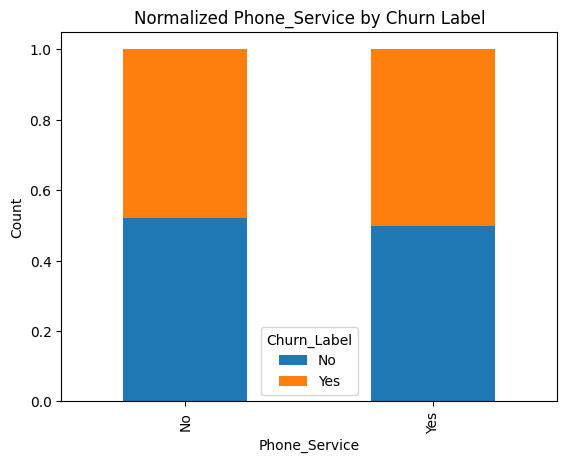

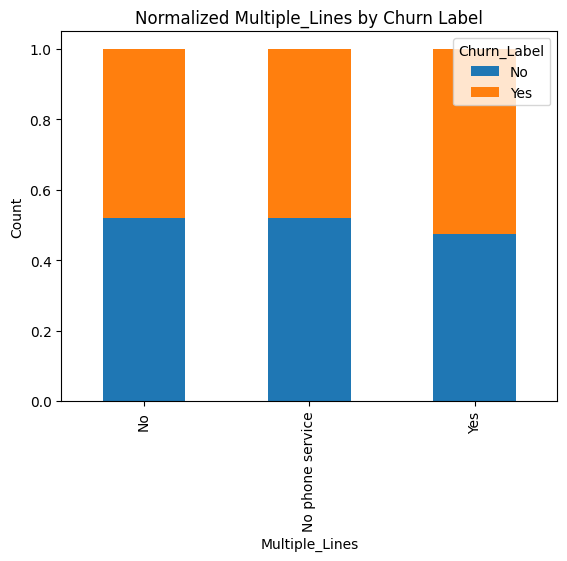

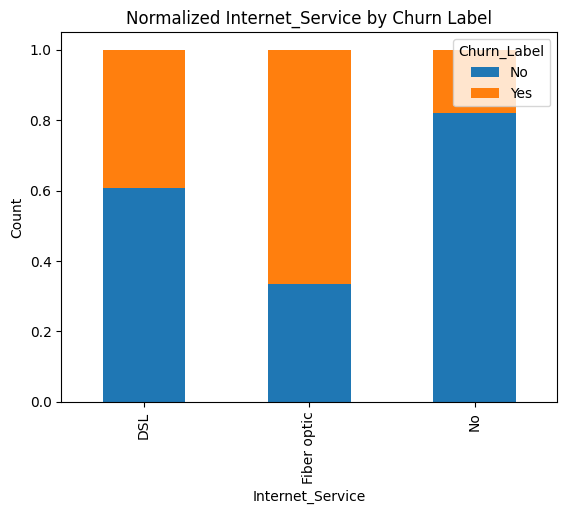

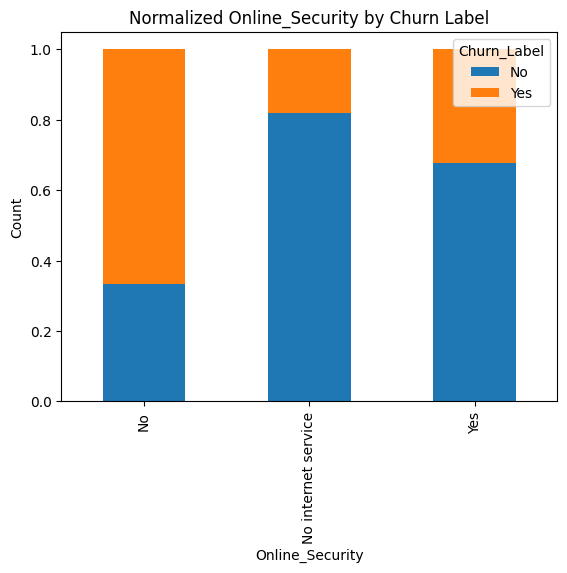

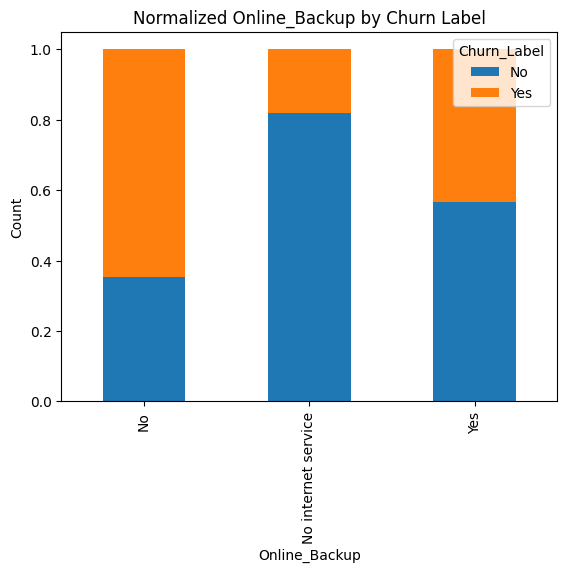

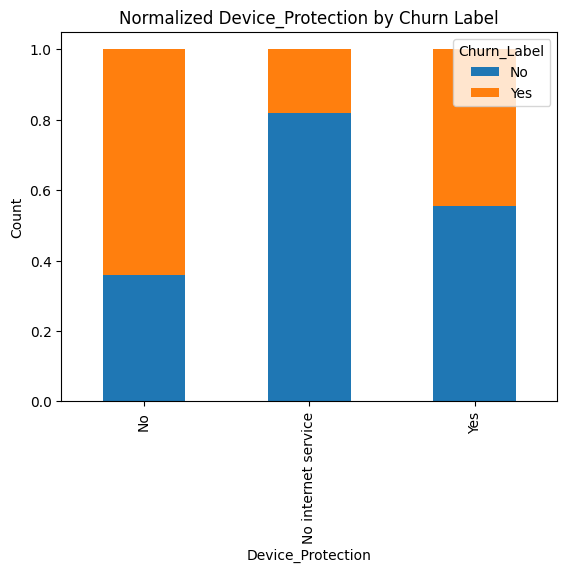

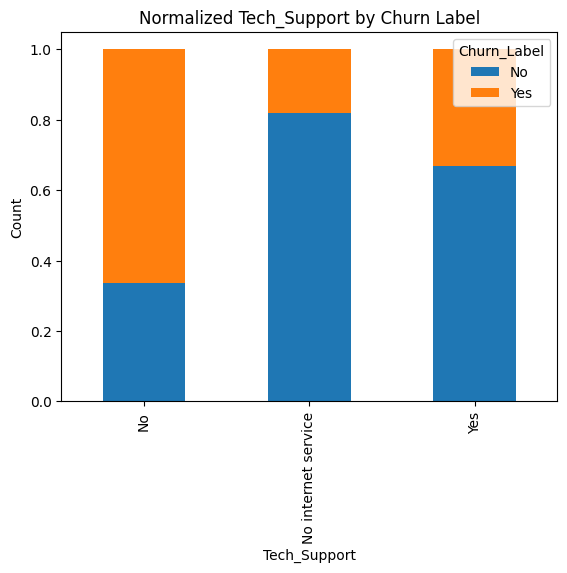

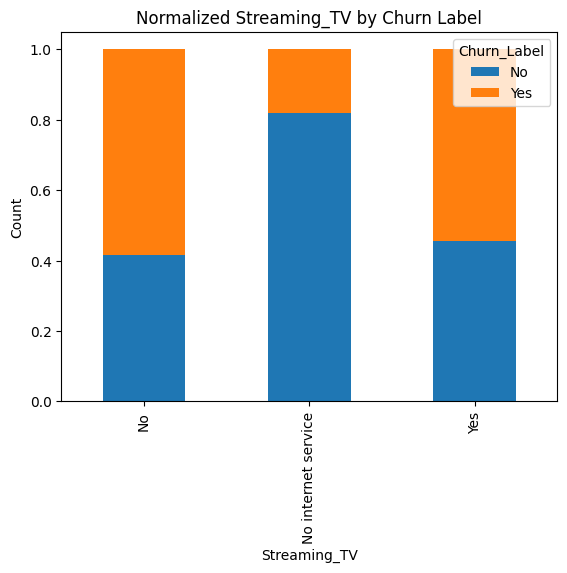

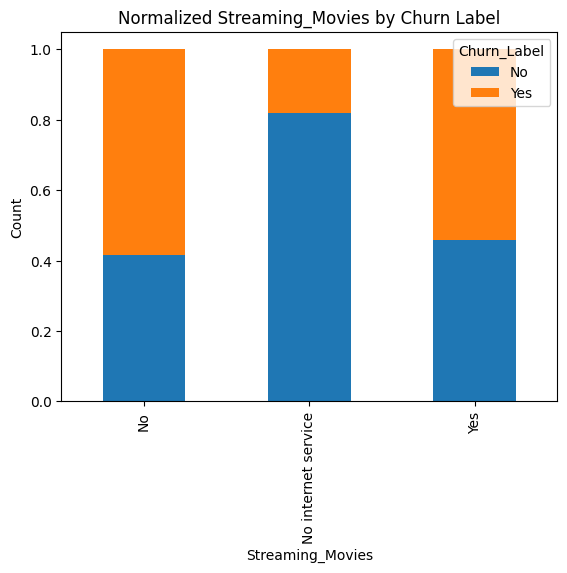

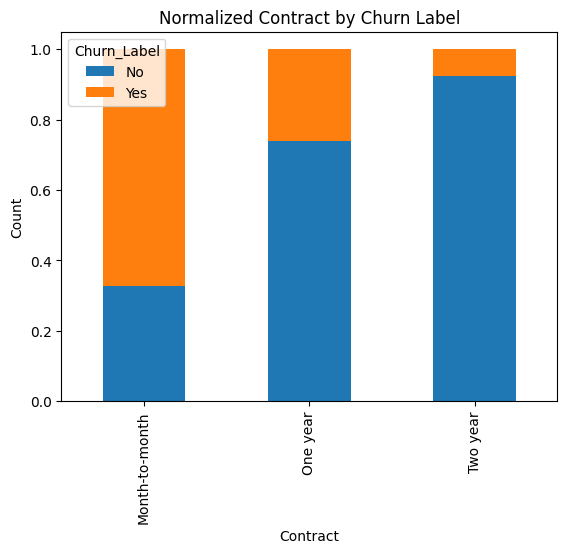

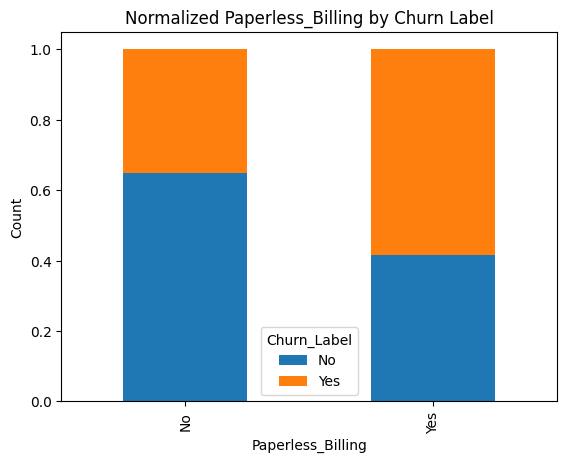

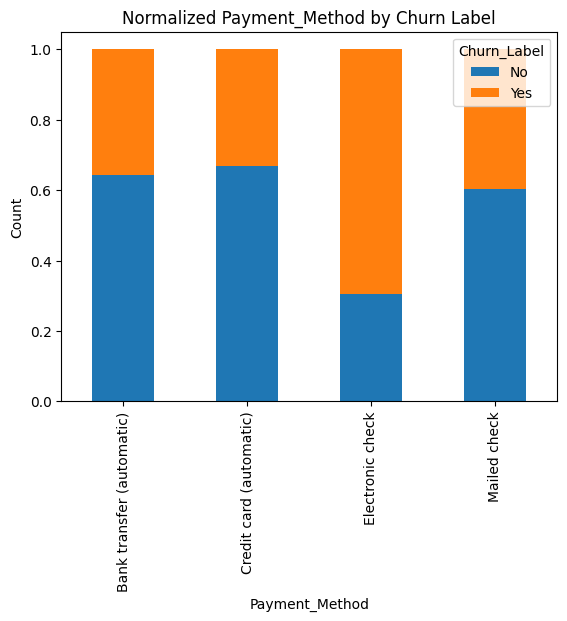

In [ ]:
for column in dfCat.columns:
    cross_tab = pd.crosstab(index=dfCat[column], columns=df['Churn_Label'])
    cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
    norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
    norm_cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"Normalized {column} by Churn Label")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Those more likely to churn include customers who:

* are senior citizens
* without a partner
* without dependents
* have multiple lines
* subscribed to Fiber optic (indicates issues w/ internet services)
* not subscribed to online security
* not subscribed to online backup services
* not subscribed to device protection services
* not subscribed to tech support
* on month-to-month contracts
* signed up for paperless billing
* using electronic check as payment method



### Location

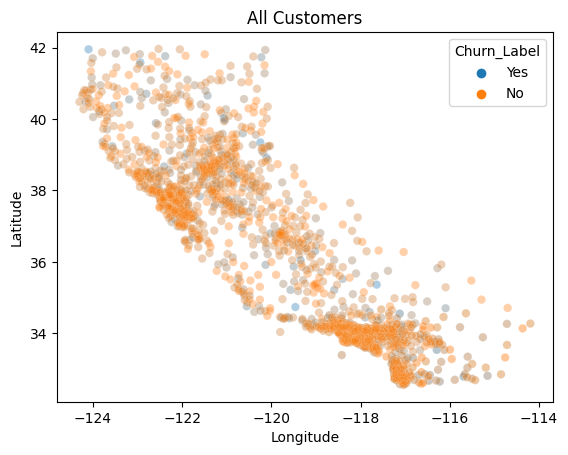

In [ ]:
# All customers
sns.scatterplot(x=df['Longitude'], y=df['Latitude'],data=df,alpha=0.1,hue='Churn_Label')
plt.title('All Customers')
plt.show()

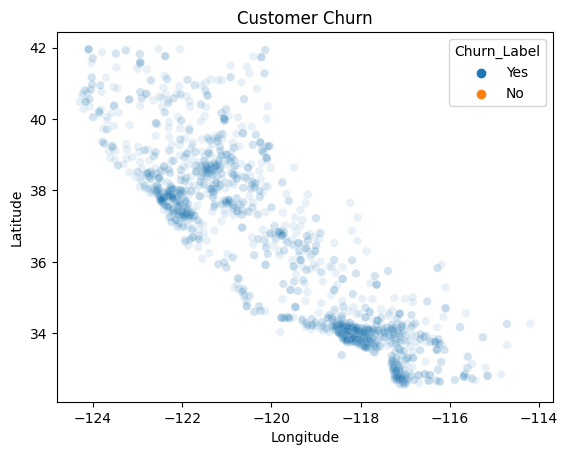

In [ ]:
# Map only customers who churned
df_yes_churn = df[df['Churn_Label'] == 'Yes']
sns.scatterplot(x=df_yes_churn['Longitude'], y=df_yes_churn['Latitude'],data=df,alpha=0.1,hue='Churn_Label')
plt.title('Customer Churn')
plt.show()

* There is significant churn around Los Angeles and San Diego
* Possible competitor that moved into the area?

In [ ]:
# Top ten cities
df['City'].value_counts().head(10)

Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
Fresno            64
Long Beach        60
Oakland           52
Stockton          44
Bakersfield       40
Name: City, dtype: int64

### Explore Target Variable

In [ ]:
df['Churn_Label'].value_counts()

No     5174
Yes    1869
Name: Churn_Label, dtype: int64

In [ ]:
((df['Churn_Label'].value_counts())/(len(df)))*100

No     73.463013
Yes    26.536987
Name: Churn_Label, dtype: float64

The entire dataset contains 1869 (26.54%) customers who churned.

In [ ]:
df['Churn_Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn_Reason, 

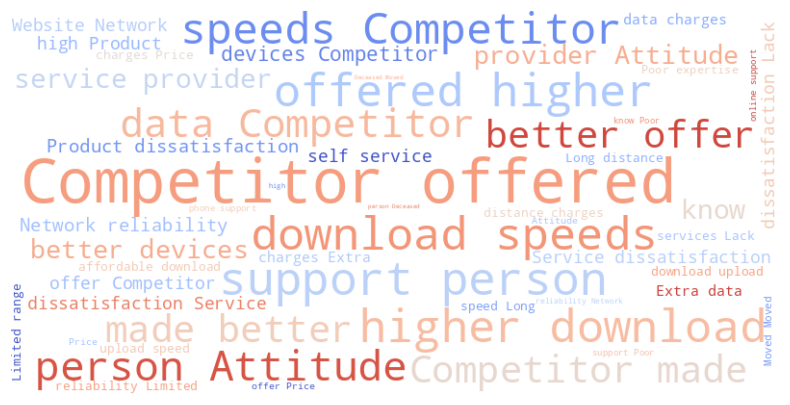

In [ ]:
# Generate word cloud from churn reason
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all churn reaons into a single string
all_reasons_text = ' '.join(df['Churn_Reason'].dropna().astype(str))

# Generate wordcloud and display
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm_r').generate(all_reasons_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Many of the churn reasons are related to competitors in the market, pricing, and customer support.

### Churn Score from IBM Model

Text(0.5, 1.0, 'IBM SPSS Churn Score vs. Label')

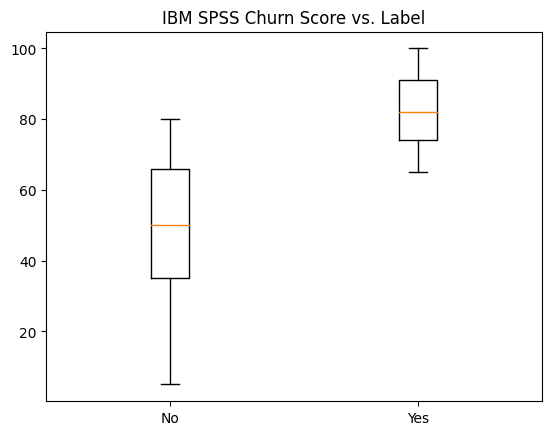

In [ ]:
# Visualize churn score from IBM model against true values
groupedChurn = df.groupby('Churn_Value')['Churn_Score'].apply(list)
boxplot = plt.boxplot(groupedChurn, labels=['No','Yes'])
plt.title('IBM SPSS Churn Score vs. Label')

In [ ]:
# Extract boxplot statistics
medians = [median.get_ydata()[0] for median in boxplot['medians']]
q1_lines = [q1.get_ydata()[0] for q1 in boxplot['boxes']]
q3_lines = [q3.get_ydata()[2] for q3 in boxplot['boxes']]
lower_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][:2]]
upper_whiskers = [whiskers.get_ydata()[1] for whiskers in boxplot['whiskers'][2:4]]
outliers = boxplot['fliers'][0].get_ydata()

# Print statistics
print("Medians:", medians)
print("Q1 (25th percentiles):", q1_lines)
print("Q3 (75th percentiles):", q3_lines)
print("Lower Whiskers:", lower_whiskers)
print("Upper Whiskers:", upper_whiskers)
print("Outliers:", outliers)

Medians: [50.0, 82.0]
Q1 (25th percentiles): [35.0, 74.0]
Q3 (75th percentiles): [66.0, 91.0]
Lower Whiskers: [5.0, 80.0]
Upper Whiskers: [65.0, 100.0]
Outliers: []


Each observation contains a numeric 'Churn Score' generated by the IBM SPSS Model. It is unclear where the cut-off is for 'Yes' and 'No' predictions. However, we can see that those with a higher Churn Score (median=82) are predicted to churn while those with a lower churn score (median=50) are predicted to stay.

## Data Wrangling

Drop irrelevant colums prior to preprocessing step

In [ ]:
df = df.drop(columns=['Lat_Long'])

In [ ]:
df['City'] = df['City'].str.replace(' ', '')

In [ ]:
df = df.drop(columns=['Churn_Label'])

### Multicollinearity

'Total_Charges' will be removed to mitigate multicollinearity issues (see correlation matrix above)

### Create pipeline for preprocessing numerical and categorical variables

Divide the columns into three groups: numerical, categorical, and boolean. Create a pipeline for each one. Then combine the pipelines together and train a model using the X and y resampled dataframes

Numerical
Binning
Scaling
Remove near-zero features

All Numerical columns before feature selection

In [ ]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
Churn_Reason          object
dtype: object

In [ ]:
numerical_features = [
 'Tenure_Months',
 'Monthly_Charges',
 'CLTV']

In [ ]:
numerical_transformer = Pipeline(steps=[
    #('binning', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')),
    ('scaling', StandardScaler(with_mean=True, with_std=True)),
    ('zerovar', VarianceThreshold(threshold=0.01))
])

**If we want to see which features the VarThreshold removed then you have to do it before the pipeline.**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Define the selector
#selector = VarianceThreshold(threshold=0)

# Fit the selector to the data
#selector.fit(num)

# Get a boolean mask where True indicates the feature was kept
#mask = selector.get_support()

# Get the list of removed features
#removed_features = [feature for bool, feature in zip(mask, num.columns) if not bool]

#print("Removed features:", removed_features)


Categorical
Dummy variables

All Categorical columns before feature selection

In [ ]:
categorical_features = [
 'City',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method'
]

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Testing & Validation: Data splitting


In [ ]:
X = df.drop(columns=['Churn_Value'])
y = df['Churn_Value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set further into training and validation sets
#X_train, X_validate, y_train, y_validate = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

# Apply oversampling only on the training set
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

X_train = X_resampled
y_train = y_resampled

## Modeling


### Classifiers

In [ ]:
classifier_log = LogisticRegression(max_iter=1000)

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=200)

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn2 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
classifier_nn =MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

### Pipeline Construction


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
feature_selection = SelectFromModel(RandomForestClassifier(n_estimators=100))


In [ ]:
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', )
])

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('feature_selection', feature_selection),
    ('classifier', classifier_rf)
])

In [ ]:
pipeline_log = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('feature_selection', feature_selection),
    ('classifier', classifier_log)
])

In [ ]:
pipeline_knn = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('feature_selection', feature_selection),
    ('classifier', classifier_knn)
])

In [ ]:
pipeline_nn = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('feature_selection', feature_selection),
    ('classifier', classifier_nn)
])

## Fit the Pipeline

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
pipeline_log.fit(X_train, y_train)
y_pred_log = pipeline_log.predict(X_test)

###KNN model

In [ ]:
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

#### Visualize the KNN model.

**There are three numerical features and knn can only be visualied in two dimensions so there are three total graphs.**

In [ ]:
pipeline_knn2 = Pipeline(steps=[
    ('classifier', classifier_knn)
])

In [ ]:
pipeline_knn3 = Pipeline(steps=[
    ('classifier', classifier_knn2)
])

**Reduce the X_train and X_test down to 2-Dimensions. fit a knn classifier to the training sets. Convert test sets to numpy arrays. The use plot_decision_regions() to plot decsion boundries.**

####  KNN Classifier : 5 Nearest neigbors

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

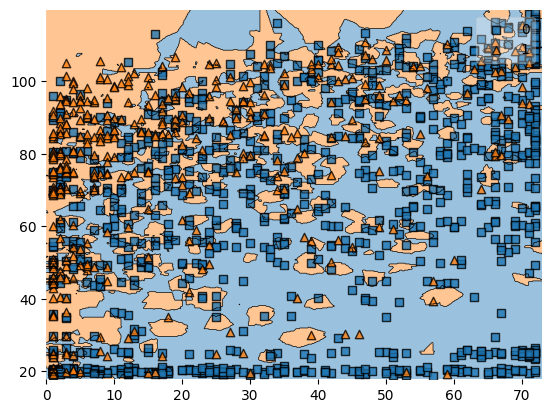

In [ ]:
train = X_train.loc[:, ['Tenure_Months', 'Monthly_Charges']]
test = X_test.loc[:, ['Tenure_Months', 'Monthly_Charges']]
pipeline_knn2.fit(train, y_train)
X_test2 = test.to_numpy()
y_test2 = y_test.to_numpy()

plot_decision_regions(X_test2, y_test2, pipeline_knn2)

#### KNN Classifier: 3 Nearest neigbors

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

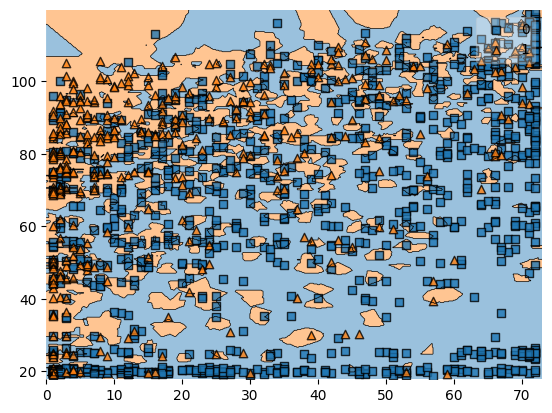

In [ ]:
train = X_train.loc[:, ['Tenure_Months', 'Monthly_Charges']]
test = X_test.loc[:, ['Tenure_Months', 'Monthly_Charges']]
pipeline_knn3.fit(train, y_train)
X_test2 = test.to_numpy()
y_test2 = y_test.to_numpy()

plot_decision_regions(X_test2, y_test2, pipeline_knn3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

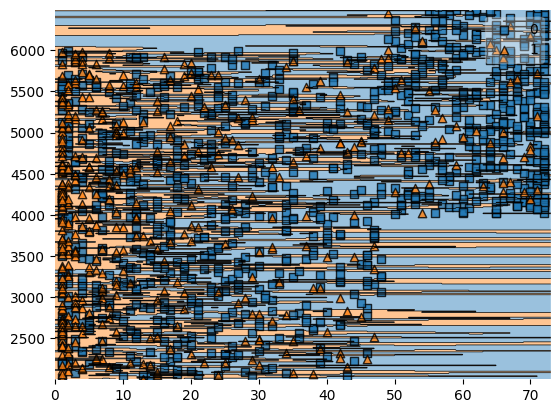

In [ ]:
train = X_train.loc[:, ['Tenure_Months', 'CLTV']]
test = X_test.loc[:, ['Tenure_Months', 'CLTV']]
pipeline_knn2.fit(train, y_train)
X_test2 = test.to_numpy()
y_test2 = y_test.to_numpy()

plot_decision_regions(X_test2, y_test2, pipeline_knn2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

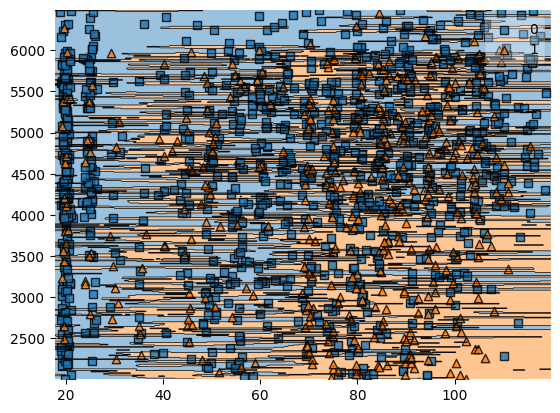

In [ ]:
train = X_train.loc[:, ['Monthly_Charges', 'CLTV']]
test = X_test.loc[:, ['Monthly_Charges', 'CLTV']]
pipeline_knn2.fit(train, y_train)
X_test2 = test.to_numpy()
y_test2 = y_test.to_numpy()

plot_decision_regions(X_test2, y_test2, pipeline_knn2)

In [ ]:
pipeline_nn.fit(X_train, y_train)
y_pred_nn = pipeline_nn.predict(X_test)

### Random Forest Classifier: **Feature selection outside of pipeline**

In [ ]:
pipeline_fs = Pipeline(steps=[
    ('preprocess', preprocessor)
])

X_train_preprocessed = pipeline_fs.fit_transform(X_train)


rf_feature_selection = RandomForestClassifier(n_estimators=100)
rf_feature_selection.fit(X_train_preprocessed, y_train)


feature_importances = rf_feature_selection.feature_importances_


num_features_to_keep = 10
selected_feature_indices = (-feature_importances).argsort()[:num_features_to_keep]


X_train_subset = X_train_preprocessed[:, selected_feature_indices]
X_test_subset = pipeline_fs.transform(X_test)[:, selected_feature_indices]


final_model = RandomForestClassifier(n_estimators=200)
final_model.fit(X_train_subset, y_train)

y_pred_RF_FS = final_model.predict(X_test_subset)


In [ ]:
selected_feature_names = pipeline_fs.named_steps['preprocess'].get_feature_names_out(input_features=None)
selected_feature_names = [name for name in selected_feature_names if name != 'y_train']

In [ ]:
print("Top {} Important Features:".format(num_features_to_keep))
for feature_index in selected_feature_indices:
    print(f"{selected_feature_names[feature_index]}: {feature_importances[feature_index]}")

Top 10 Important Features:
num__Tenure_Months: 0.0940238717235174
num__Monthly_Charges: 0.07049003008069685
num__CLTV: 0.06740297197814331
cat__Contract_Month-to-month: 0.049086494673870176
cat__Online_Security_No: 0.031174254285729543
cat__Tech_Support_No: 0.027641160018151183
cat__Contract_Two year: 0.027609942908333397
cat__Dependents_No: 0.023930725480588187
cat__Dependents_Yes: 0.02054510611886161
cat__Payment_Method_Electronic check: 0.019072706630484403


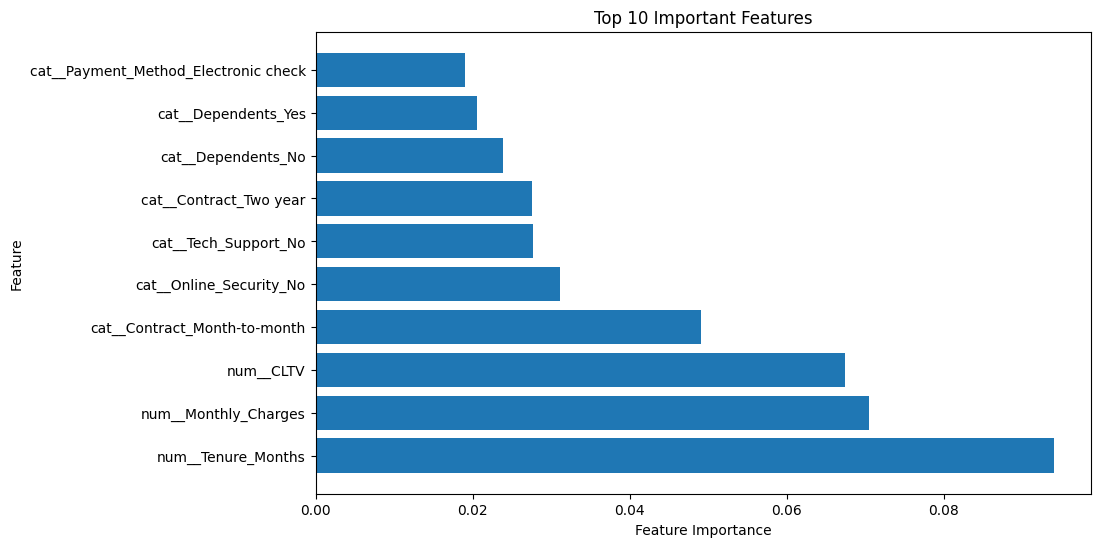

In [ ]:
selected_feature_indices_list = list(selected_feature_indices)

plt.figure(figsize=(10, 6))
plt.barh(range(num_features_to_keep), feature_importances[selected_feature_indices_list], align='center')
plt.yticks(range(num_features_to_keep), [selected_feature_names[i] for i in selected_feature_indices_list])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features'.format(num_features_to_keep))
plt.show()

## Assessing Model Performance

### Accuracy

Accuracy
* measures the proportion of all correctly classified instances out of the total number of instances (i.e the percentage of customers correctly classified, both churn and no churn)
* = (TP+TN)/(TP+TN+FP+FN)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [ ]:
accuracy_rf= accuracy_score(y_test, y_pred)
print("Accuracy_RF: {:.2f}%".format(accuracy_rf * 100))

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy_log: {:.2f}%".format(accuracy_log * 100))

accuracy_RF_FS = accuracy_score(y_test, y_pred_RF_FS)
print("Accuracy_RF_FS: {:.2f}%".format(accuracy_RF_FS * 100))

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy_KNN: {:.2f}%".format(accuracy_knn * 100))
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy_NN: {:.2f}%".format(accuracy_nn * 100))

Accuracy_RF: 79.63%
Accuracy_log: 74.95%
Accuracy_RF_FS: 77.00%
Accuracy_KNN: 71.54%
Accuracy_NN: 77.15%


### Precision, Recall, F1-Score

Precision:
* measures the proportion of true positives out of all instances predicted as positive by the model (i.e the percentage of customers predicted to churn who actually churned)
* = TP/(TP+FP)

Recall:
* aka sensitivity, true positive rate
* measures the proportion of true positive predictions out of all actual positive instances (i.e the percentage of customer churn correctly identified)
* = TP/(TP+FN)



In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1009
           1       0.64      0.64      0.64       400

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1009
           1       0.54      0.79      0.64       400

    accuracy                           0.75      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



In [ ]:
print(classification_report(y_test,y_pred_RF_FS))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1009
           1       0.59      0.60      0.60       400

    accuracy                           0.77      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.77      0.77      0.77      1409



In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1009
           1       0.50      0.80      0.62       400

    accuracy                           0.72      1409
   macro avg       0.70      0.74      0.69      1409
weighted avg       0.78      0.72      0.73      1409



In [ ]:
print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1009
           1       0.60      0.61      0.60       400

    accuracy                           0.77      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.77      0.77      0.77      1409



## Ensemble Method #1

In [ ]:
ensemble_predictions = mode([y_pred, y_pred_knn, y_pred_log, y_pred_nn], axis=0, keepdims=True)[0].flatten()

In [ ]:
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.7927608232789212


In [ ]:
print(classification_report(y_test,ensemble_predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1009
           1       0.63      0.66      0.64       400

    accuracy                           0.79      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.80      0.79      0.79      1409



## Ensemble with Cross Validation


In [ ]:
y_pred_cv_rf = cross_val_predict(pipeline, X_train, y_train, cv=5)
y_pred_cv_knn = cross_val_predict(pipeline_knn, X_train, y_train, cv=5)
y_pred_cv_logreg = cross_val_predict(pipeline_log, X_train, y_train, cv=5)
y_pred_cv_nn = cross_val_predict(pipeline_nn, X_train, y_train, cv=5)

In [ ]:
ensemble_CV_predictions = mode([y_pred_cv_rf, y_pred_cv_knn, y_pred_cv_logreg, y_pred_cv_nn], axis=0, keepdims=True)[0].flatten()

In [ ]:
print("Ensemble CV Predictions:", ensemble_CV_predictions)

Ensemble CV Predictions: [0 1 0 ... 1 1 1]


In [ ]:
ensemble_cv_accuracy = accuracy_score(y_train, ensemble_CV_predictions)
print("Ensemble CV Accuracy:", ensemble_cv_accuracy)

Ensemble CV Accuracy: 0.863625450180072


In [ ]:
print(classification_report(y_train,ensemble_CV_predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4165
           1       0.84      0.90      0.87      4165

    accuracy                           0.86      8330
   macro avg       0.87      0.86      0.86      8330
weighted avg       0.87      0.86      0.86      8330



In [ ]:
ensemble_CV_predictions_matched = ensemble_CV_predictions[:len(y_test)]

In [ ]:
print(classification_report(y_test, ensemble_CV_predictions_matched))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66      1009
           1       0.25      0.32      0.28       400

    accuracy                           0.54      1409
   macro avg       0.48      0.47      0.47      1409
weighted avg       0.57      0.54      0.56      1409



##Ensemble Method with adjusted Weights

In [ ]:
weight_rf = 0.7
weight_knn = 0.1
weight_logreg = 0.1
weight_nn = 0.1

In [ ]:
weight_pred = y_pred * weight_rf
weight_knn_pred = y_pred_knn * weight_knn
weight_log_pred = y_pred_log * weight_logreg
weight_nn_pred = y_pred_nn * weight_nn


In [ ]:
ensemble_predictions_weight = mode([weight_pred, weight_knn_pred, weight_log_pred, weight_nn_pred], axis=0, keepdims=True)[0].flatten()


In [ ]:
threshold = 0.5
binary_predictions = (ensemble_predictions_weight >= threshold).astype(int)

In [ ]:
ensemble_accuracy_weighted = accuracy_score(y_test, binary_predictions)
print("Ensemble Accuracy_Weighted:", ensemble_accuracy_weighted)

Ensemble Accuracy_Weighted: 0.71611071682044


In [ ]:
print(classification_report(y_test,binary_predictions))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1009
           1       0.00      0.00      0.00       400

    accuracy                           0.72      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.51      0.72      0.60      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ensemble Method #2 - Stacked


In [ ]:
# Stack the predictions together
stacked_predictions = np.column_stack((y_pred, y_pred_knn, y_pred_log, y_pred_nn))

# Split the stacked predictions for meta-model training and validation
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(stacked_predictions, y_test, test_size=0.2, random_state=42)

# train ensemble model
meta_model = LogisticRegression()
meta_model.fit(X_train_meta, y_train_meta)

meta_pred = meta_model.predict(X_val_meta)

# measure accuracy
meta_model_score = meta_model.score(X_val_meta, y_val_meta)
print(f"Meta-model accuracy: {meta_model_score:.4f}")

#accuracy_score(y_val_meta, meta_pred)
classification_report(y_val_meta, meta_pred)

Meta-model accuracy: 0.7730


'              precision    recall  f1-score   support\n\n           0       0.87      0.82      0.85       214\n           1       0.53      0.62      0.57        68\n\n    accuracy                           0.77       282\n   macro avg       0.70      0.72      0.71       282\nweighted avg       0.79      0.77      0.78       282\n'

# table

In [ ]:
metrics_dict = {
    "Random Forest": [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)],
    "Logistic": [accuracy_score(y_test, y_pred_log), precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)],
    "K Nearest Neighbor": [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)],
    "Neural Network": [accuracy_score(y_test, y_pred_nn), precision_score(y_test, y_pred_nn), recall_score(y_test, y_pred_nn), f1_score(y_test, y_pred_nn)],
    "Ensemble Method #1": [accuracy_score(y_test, ensemble_predictions), precision_score(y_test, ensemble_predictions), recall_score(y_test, ensemble_predictions), f1_score(y_test, ensemble_predictions)],
    "Ensemble Cross Validation": [accuracy_score(y_train, ensemble_CV_predictions), precision_score(y_train, ensemble_CV_predictions), recall_score(y_train, ensemble_CV_predictions), f1_score(y_train, ensemble_CV_predictions)],
    "Weighted Ensemble Method #1": [accuracy_score(y_test, binary_predictions), 0.72, 1, 0.83],
    "Stacked Ensemble": [accuracy_score(y_val_meta, meta_pred), precision_score(y_val_meta, meta_pred), recall_score(y_val_meta, meta_pred), f1_score(y_val_meta, meta_pred)]
}
# Create DataFrame from dictionary
df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df = df.round(3)
print(df)

                             Accuracy  Precision  Recall     F1
Random Forest                   0.796      0.643   0.635  0.639
Logistic                        0.749      0.540   0.788  0.641
K Nearest Neighbor              0.715      0.499   0.802  0.616
Neural Network                  0.771      0.596   0.608  0.601
Ensemble Method #1              0.793      0.629   0.660  0.644
Ensemble Cross Validation       0.864      0.840   0.898  0.868
Weighted Ensemble Method #1     0.716      0.720   1.000  0.830
Stacked Ensemble                0.773      0.525   0.618  0.568


## Visualizations

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fpr, tpr, _ = roc_curve(y_train, ensemble_CV_predictions)
roc_auc = auc(fpr, tpr)

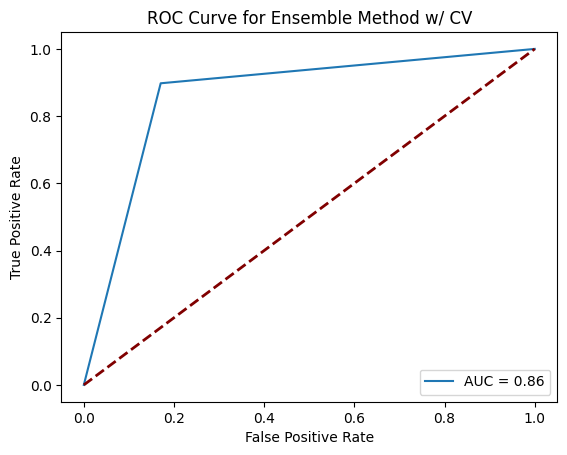

In [ ]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.title('ROC Curve for Ensemble Method w/ CV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='maroon', lw=2, linestyle='--',label='Random Guessing')

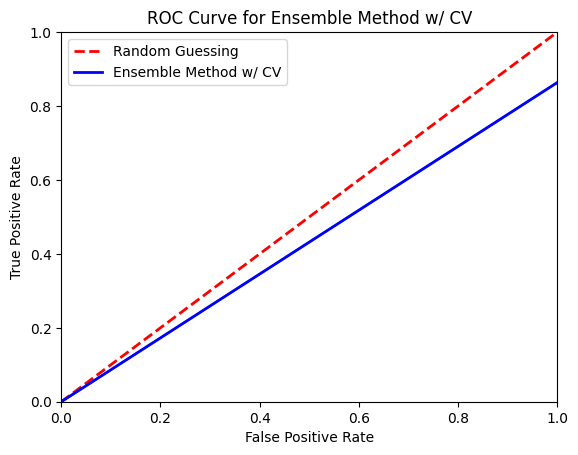

In [ ]:
roc_display = RocCurveDisplay(fpr=[0, 1], tpr=[0, ensemble_cv_accuracy])
roc_display.plot()

# Customize the plot
plt.title('ROC Curve for Ensemble Method w/ CV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--',label='Random Guessing')
plt.plot([0, 1], [0, ensemble_cv_accuracy], color='blue', lw=2, label='Ensemble Method w/ CV')
plt.legend()
plt.show()


